In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'/Users/maxwell/Documents/CMU/Courses/Mini 5/ML Capstone/ML-Capstone/Code'

In [3]:
data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')
data.Time = pd.to_datetime(data.Time)
test_data.Time = pd.to_datetime(test_data.Time)
data = data.iloc[::-1].reset_index(drop = True)
test_data = test_data.iloc[::-1].reset_index(drop = True)

In [4]:
data.drop(['Unnamed: 0'], axis = 1, inplace=True)
test_data.drop(['Unnamed: 0'], axis = 1, inplace=True)

## Study Weekly Frequency

In [5]:
data.columns

Index(['Time', 'Libor 1Y', 'JPY', 'EUR', 'SPX', 'VIX', '1Y OIS', 'Positioning',
       'lev Positioning', 'Signal', 'TFF1LATL INDEX', 'TFF1LLTL INDEX',
       'TFF1LLTS INDEX', 'TFF1LATS INDEX', 'USDX_Close', 'mktrf', 'umd',
       'JNK_Price', 'JNK_Volume', 'TFF1LAIL INDEX', 'TFF1LLFS INDEX',
       'FedFunds', 'TFF1LAIS INDEX', 'TFF1LLFL INDEX', 'T10Y3M', 'T10Y2Y',
       'T10YIE', 'Libor 3 mo', 'Libor 6 mo', 'WILL5000INDFC', 'NASDAQCOM',
       'VXVCLS', 'GVZCLS', 'GOLD_price', 'DTWEXBGS', 'SPY Flows', 'IVV'],
      dtype='object')

In [7]:
test_data.columns

Index(['Time', 'Libor 1Y', 'JPY', 'EUR', 'SPX', 'VIX', '1Y OIS', 'Positioning',
       'lev Positioning', 'Signal', 'TFF1LATL INDEX', 'TFF1LLTL INDEX',
       'TFF1LLTS INDEX', 'TFF1LATS INDEX', 'USDX_Close', 'mktrf', 'umd',
       'JNK_Price', 'JNK_Volume', 'TFF1LAIL INDEX', 'TFF1LLFS INDEX',
       'FedFunds', 'TFF1LAIS INDEX', 'TFF1LLFL INDEX', 'T10Y3M', 'T10Y2Y',
       'T10YIE', 'Libor 3 mo', 'Libor 6 mo', 'WILL5000INDFC', 'NASDAQCOM',
       'VXVCLS', 'GVZCLS', 'GOLD_price', 'DTWEXBGS', 'SPY Flows', 'IVV'],
      dtype='object')

### Feature Generation

There are different types of variables:
- FX: JPY, EUR
- Rates/Spreads: 1Y OIS, FedFunds, T10Y3M, T10Y2Y, T10YIE, Libor 3 mo, Libor 6 mo
- Indices/Prices: SPX, WILL5000INDFC, NASDAQCOM, VXVCLS, GVZCLS, Gold_price, DTWEXBGS, JNK_Price
- Volume: JNK_Volume

We use different approachs to aggregate these variables: for the first two types we take an average to indicate the different levels the markets are being and for the latter two we take an sum.

In [8]:
shift_diff = ['SPX', 'WILL5000INDFC', 'NASDAQCOM', 'VXVCLS', 
              'GVZCLS', 'GOLD_price', 'DTWEXBGS', 'JNK_Price']

In [9]:
for sd in shift_diff:
    data[sd] = np.log(data[sd]).diff().shift(1)
    test_data[sd] = np.log(test_data[sd]).diff().shift(1)

__Aggregation__

In [10]:
K = 5

In [11]:
roll_sum = ['SPX', 'WILL5000INDFC', 'NASDAQCOM', 'VXVCLS', 
              'GVZCLS', 'GOLD_price', 'DTWEXBGS', 'JNK_Price', 'JNK_Volume']

In [12]:
for rs in roll_sum:
    data[rs+'Weekly'] = data[rs].rolling(K, min_periods=1).sum()
    test_data[rs+'Weekly'] = test_data[rs].rolling(K, min_periods=1).sum()

In [13]:
roll_mean = ['JPY', 'EUR', '1Y OIS', 'FedFunds', 'T10Y3M', 
             'T10Y2Y', 'T10YIE', 'Libor 3 mo', 'Libor 6 mo']

In [14]:
for rm in roll_mean:
    data[rm+'WeeklyMean'] = data[rm].rolling(K, min_periods=1).mean()
    test_data[rm+'WeeklyMean'] = test_data[rm].rolling(K, min_periods=1).mean()

In [15]:
data.columns

Index(['Time', 'Libor 1Y', 'JPY', 'EUR', 'SPX', 'VIX', '1Y OIS', 'Positioning',
       'lev Positioning', 'Signal', 'TFF1LATL INDEX', 'TFF1LLTL INDEX',
       'TFF1LLTS INDEX', 'TFF1LATS INDEX', 'USDX_Close', 'mktrf', 'umd',
       'JNK_Price', 'JNK_Volume', 'TFF1LAIL INDEX', 'TFF1LLFS INDEX',
       'FedFunds', 'TFF1LAIS INDEX', 'TFF1LLFL INDEX', 'T10Y3M', 'T10Y2Y',
       'T10YIE', 'Libor 3 mo', 'Libor 6 mo', 'WILL5000INDFC', 'NASDAQCOM',
       'VXVCLS', 'GVZCLS', 'GOLD_price', 'DTWEXBGS', 'SPY Flows', 'IVV',
       'SPXWeekly', 'WILL5000INDFCWeekly', 'NASDAQCOMWeekly', 'VXVCLSWeekly',
       'GVZCLSWeekly', 'GOLD_priceWeekly', 'DTWEXBGSWeekly', 'JNK_PriceWeekly',
       'JNK_VolumeWeekly', 'JPYWeeklyMean', 'EURWeeklyMean',
       '1Y OISWeeklyMean', 'FedFundsWeeklyMean', 'T10Y3MWeeklyMean',
       'T10Y2YWeeklyMean', 'T10YIEWeeklyMean', 'Libor 3 moWeeklyMean',
       'Libor 6 moWeeklyMean'],
      dtype='object')

In [19]:
weekly_data = data[['Time','Positioning', 'lev Positioning','SPXWeekly', 'WILL5000INDFCWeekly', 'NASDAQCOMWeekly', 'VXVCLSWeekly',
       'GVZCLSWeekly', 'GOLD_priceWeekly', 'DTWEXBGSWeekly', 'JNK_PriceWeekly',
       'JNK_VolumeWeekly', 'JPYWeeklyMean', 'EURWeeklyMean',
       '1Y OISWeeklyMean', 'FedFundsWeeklyMean', 'T10Y3MWeeklyMean',
       'T10Y2YWeeklyMean', 'T10YIEWeeklyMean', 'Libor 3 moWeeklyMean',
       'Libor 6 moWeeklyMean']]
test_weekly_data = test_data[['Time','Positioning', 'lev Positioning','SPXWeekly', 'WILL5000INDFCWeekly', 'NASDAQCOMWeekly', 'VXVCLSWeekly',
       'GVZCLSWeekly', 'GOLD_priceWeekly', 'DTWEXBGSWeekly', 'JNK_PriceWeekly',
       'JNK_VolumeWeekly', 'JPYWeeklyMean', 'EURWeeklyMean',
       '1Y OISWeeklyMean', 'FedFundsWeeklyMean', 'T10Y3MWeeklyMean',
       'T10Y2YWeeklyMean', 'T10YIEWeeklyMean', 'Libor 3 moWeeklyMean',
       'Libor 6 moWeeklyMean']]

In [20]:
weekly_data = weekly_data.dropna()
test_weekly_data = test_weekly_data.dropna()

__Positioning Dynamics__

In [21]:
weekly_data['Positioning'] = weekly_data['Positioning'].diff()
weekly_data['lev Positioning'] = weekly_data['lev Positioning'].diff()
test_weekly_data['Positioning'] = test_weekly_data['Positioning'].diff()
test_weekly_data['lev Positioning'] = test_weekly_data['lev Positioning'].diff()

In [22]:
weekly_data = weekly_data.dropna().reset_index(drop = True)
test_weekly_data = test_weekly_data.dropna().reset_index(drop = True)

In [23]:
weekly_data.columns

Index(['Time', 'Positioning', 'lev Positioning', 'SPXWeekly',
       'WILL5000INDFCWeekly', 'NASDAQCOMWeekly', 'VXVCLSWeekly',
       'GVZCLSWeekly', 'GOLD_priceWeekly', 'DTWEXBGSWeekly', 'JNK_PriceWeekly',
       'JNK_VolumeWeekly', 'JPYWeeklyMean', 'EURWeeklyMean',
       '1Y OISWeeklyMean', 'FedFundsWeeklyMean', 'T10Y3MWeeklyMean',
       'T10Y2YWeeklyMean', 'T10YIEWeeklyMean', 'Libor 3 moWeeklyMean',
       'Libor 6 moWeeklyMean'],
      dtype='object')

In [24]:
# For training purpose
time_periods = weekly_data['Time']
X_train = weekly_data.iloc[:,3:]
y_train = weekly_data.iloc[:,1]
y_train_alter = weekly_data.iloc[:,2]
X_test = test_weekly_data.iloc[:,3:]
y_test = test_weekly_data.iloc[:,1]
y_test_alter = test_weekly_data.iloc[:,2]

In [25]:
weekly_data['year'] = pd.DatetimeIndex(weekly_data['Time']).year

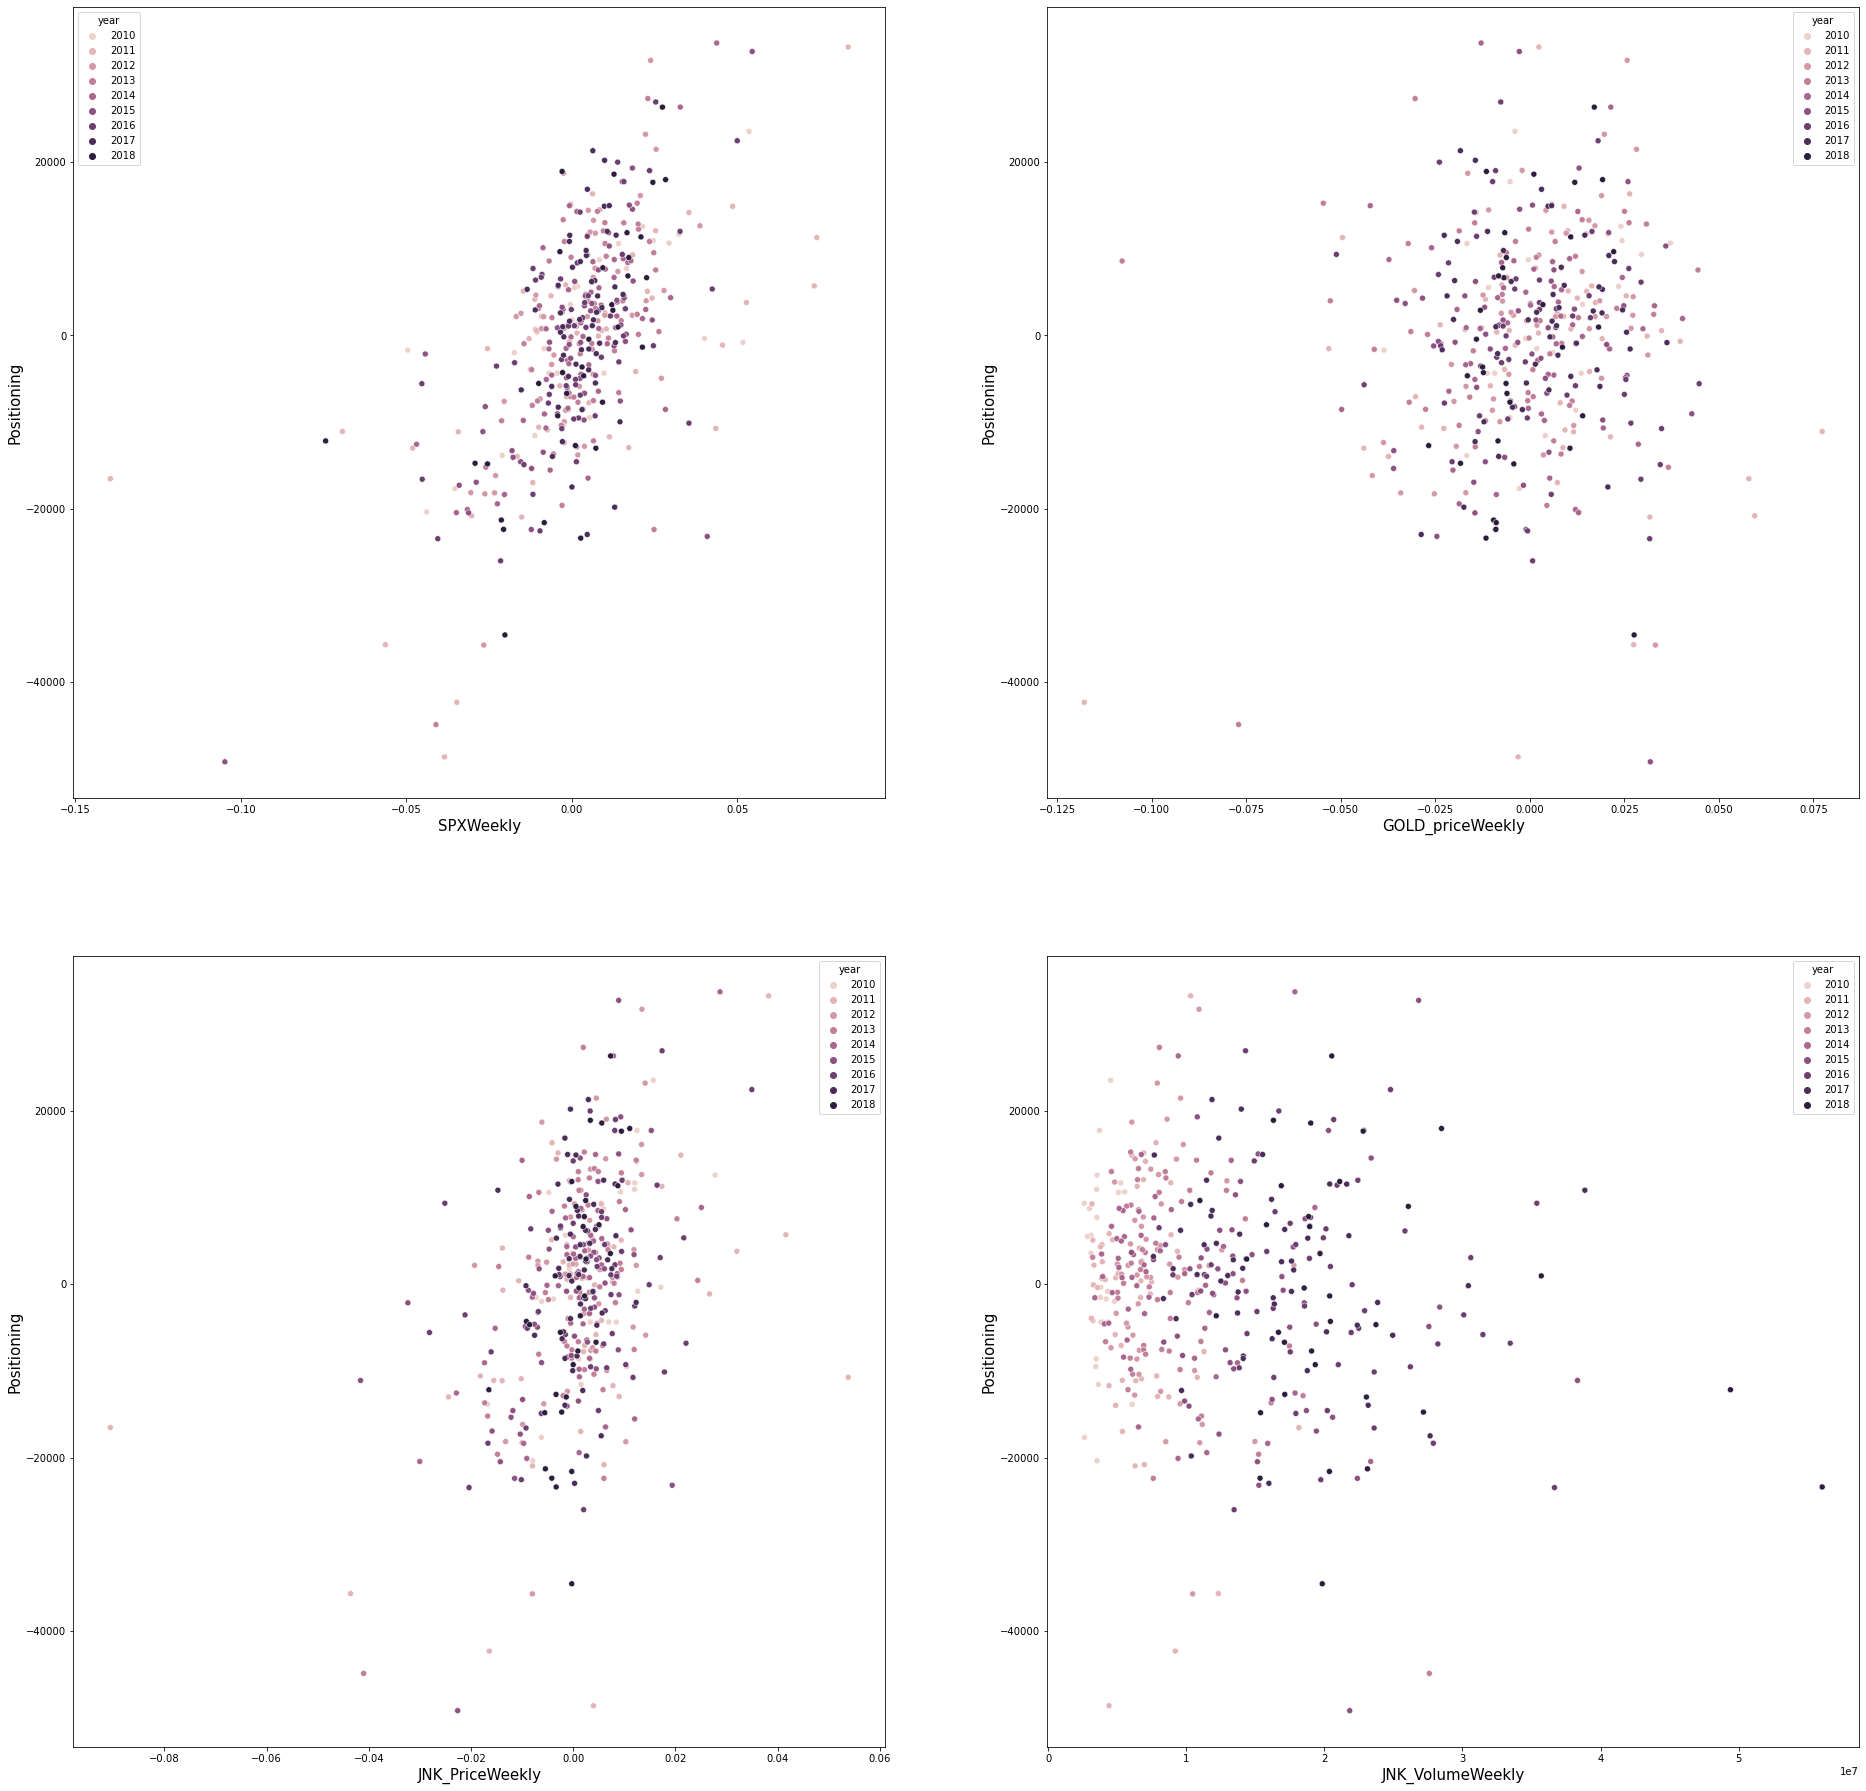

In [26]:
fig = plt.figure(figsize = (32,32))
axs = fig.subplots(2,2)
picklst = [3, 8, 10, 11]
for i in range(4):
    sns.scatterplot(x=weekly_data.iloc[:,picklst[i]], y=weekly_data.iloc[:,1], data=weekly_data, hue="year",legend="full", ax=axs[i//2,i%2])
    axs[i//2, i%2].set_ylabel(weekly_data.columns[1], fontsize = 15)
    axs[i//2, i%2].set_xlabel(weekly_data.columns[picklst[i]], fontsize = 15)

### Modeling

For starters, we want to try some basic regression-based model: ridge, lasso, GAM.

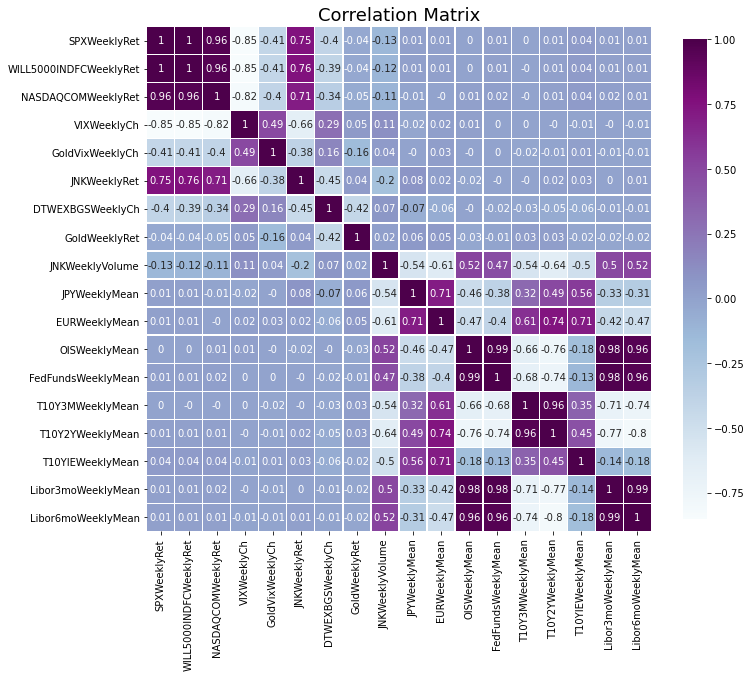

In [34]:
f, ax = plt.subplots(figsize=(11, 11))
ax = sns.heatmap(np.around(X_train.corr(),2), square=True,linewidths=.3,annot=True,cbar_kws={"shrink": .7}, cmap="BuPu")
plt.tight_layout()
plt.title('Correlation Matrix',size=18)
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train.values)
X_train_std = scaler.transform(X_train.values)
X_test_std = scaler.transform(X_test.values)

#### Ridge

In [65]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [76]:
ridge = Ridge(alpha = 1, normalize = True)
ridge_rgs = RandomizedSearchCV(estimator = ridge, param_distributions = {'alpha':np.arange(0, 1, 0.01)}, cv = 5, n_iter = 100).fit(X_train.values, y_train)

In [77]:
ridge_rgs.best_params_

{'alpha': 0.0}

In [82]:
mean_squared_error(y_test, ridge_rgs.predict(X_test.values))

207611513.6616757

In [83]:
mean_absolute_error(y_test, ridge_rgs.predict(X_test.values))

10891.052187882215

In [114]:
np.mean(np.abs(y_test - ridge_rgs.predict(X_test.values)) / y_test)

-0.1299347636555026

#### Lasso

In [84]:
lasso = Lasso(alpha = 1, max_iter = 10000, normalize = True)
lasso_rgs = RandomizedSearchCV(estimator = lasso, param_distributions = {'alpha':np.arange(1, 5, 0.01)}, cv = 5, n_iter = 100).fit(X_train.values, y_train)

In [85]:
lasso_rgs.best_params_

{'alpha': 1.04}

In [119]:
mean_squared_error(y_test, lasso_rgs.predict(X_test.values))

177171615.6969354

In [120]:
mean_absolute_error(y_test, lasso_rgs.predict(X_test.values))

9959.941810388815

In [121]:
np.mean(np.abs(y_test - lasso_rgs.predict(X_test.values)) / y_test)

-0.2894255756377123

In [122]:
X_train.columns[np.abs(lasso_rgs.best_estimator_.coef_ - 0) > 1e-4]

Index(['SPXWeekly', 'WILL5000INDFCWeekly', 'NASDAQCOMWeekly', 'VXVCLSWeekly',
       'GVZCLSWeekly', 'GOLD_priceWeekly', 'DTWEXBGSWeekly', 'JNK_PriceWeekly',
       'JNK_VolumeWeekly', 'JPYWeeklyMean', 'EURWeeklyMean',
       '1Y OISWeeklyMean', 'FedFundsWeeklyMean', 'T10Y2YWeeklyMean',
       'T10YIEWeeklyMean', 'Libor 6 moWeeklyMean'],
      dtype='object')

In [123]:
X_train.columns[np.abs(lasso_rgs.best_estimator_.coef_ - 0) < 1e-4]

Index(['T10Y3MWeeklyMean', 'Libor 3 moWeeklyMean'], dtype='object')

In [108]:
weekly_data.describe()

,Positioning,lev Positioning,SPXWeekly,WILL5000INDFCWeekly,NASDAQCOMWeekly,VXVCLSWeekly,GVZCLSWeekly,GOLD_priceWeekly,DTWEXBGSWeekly,JNK_PriceWeekly,...,JPYWeeklyMean,EURWeeklyMean,1Y OISWeeklyMean,FedFundsWeeklyMean,T10Y3MWeeklyMean,T10Y2YWeeklyMean,T10YIEWeeklyMean,Libor 3 moWeeklyMean,Libor 6 moWeeklyMean,year
count,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,...,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000
mean,-409.843091,183.250585,0.002257,0.002625,0.002924,-0.001676,-0.001320,-0.000079,0.000414,0.001166,...,0.010205,1.242365,0.513499,0.383105,2.002094,1.580117,2.004506,0.632864,0.824742,2014.053864
std,12111.656834,12060.279065,0.020833,0.021637,0.024086,0.100503,0.104744,0.021225,0.007187,0.011228,...,0.001606,0.113193,0.580530,0.481319,0.629451,0.648508,0.302401,0.564589,0.584318,2.397064
min,-49188.000000,-38285.000000,-0.139421,-0.150692,-0.151957,-0.293895,-0.392785,-0.117852,-0.019852,-0.090569,...,0.008018,1.043820,0.067900,0.058000,0.788000,0.242000,1.228000,0.223400,0.320600,2010.000000
25%,-7592.500000,-7002.000000,-0.006119,-0.006528,-0.006731,-0.061296,-0.060942,-0.011773,-0.004404,-0.002403,...,0.008899,1.127900,0.141250,0.096000,1.515000,1.046000,1.796000,0.273000,0.414300,2012.000000
50%,764.000000,-226.000000,0.002922,0.003136,0.004430,-0.004034,-0.003123,0.000572,0.000310,0.001944,...,0.009756,1.255480,0.227460,0.148000,1.958000,1.530000,2.056000,0.334400,0.544400,2014.000000
75%,6700.500000,7318.500000,0.012888,0.013471,0.015659,0.046188,0.052348,0.012787,0.004790,0.006015,...,0.011999,1.336730,0.561380,0.394000,2.491000,2.121000,2.206000,0.777600,1.137700,2016.000000
max,33728.000000,59797.000000,0.083444,0.087770,0.094000,0.716540,0.885730,0.077339,0.031963,0.053814,...,0.013087,1.481440,2.338800,1.920000,3.520000,2.884000,2.614000,2.363400,2.528800,2018.000000


In [1]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 50)
rf.fit(X_train.values, y_train)

NameError: name 'X_train' is not defined

In [117]:
mean_squared_error(y_test, rf.predict(X_test.values))

161099667.13671887

In [118]:
mean_absolute_error(y_test, rf.predict(X_test.values))

9557.353409523808

In [116]:
np.mean(np.abs(y_test - rf.predict(X_test.values)) / y_test)

-0.2136674113742378

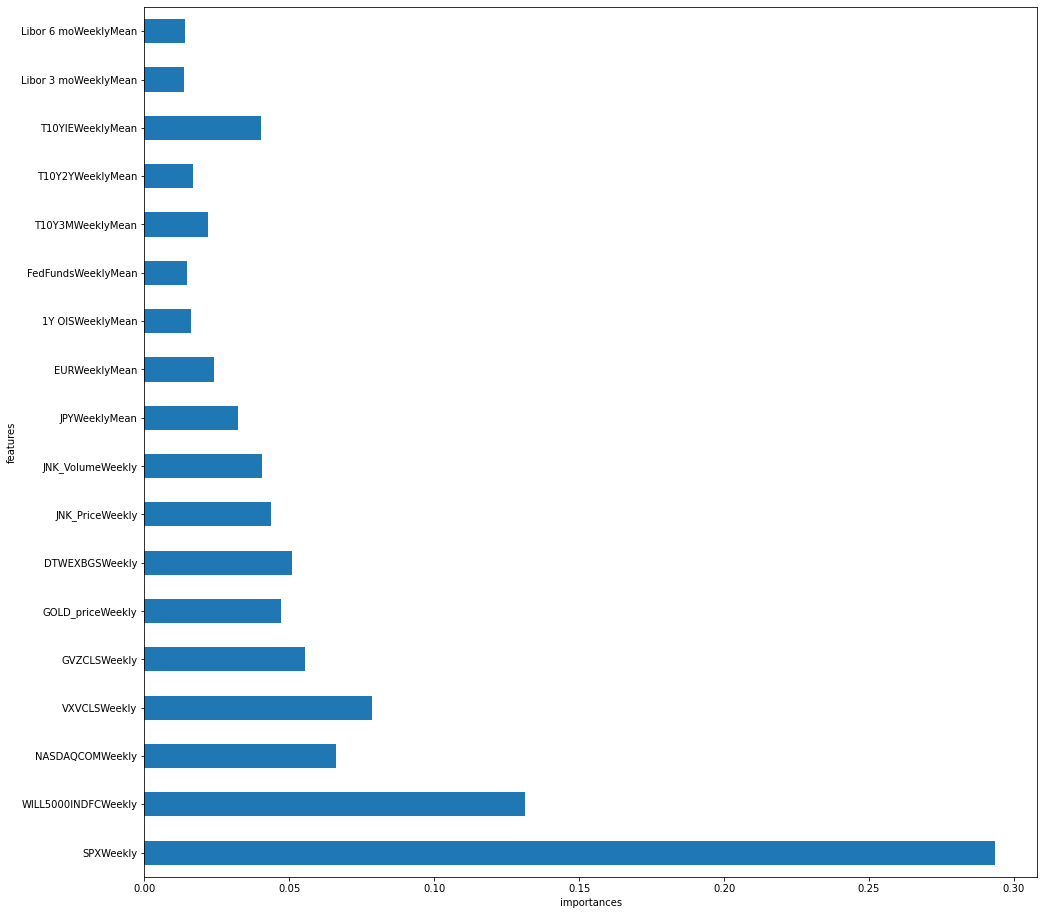

In [107]:
feat_importance = pd.Series(rf.feature_importances_, index = X_train.columns)
fig = plt.figure(figsize = [16,16])
ax = fig.subplots(1,1)
feat_importance.plot(kind = 'barh', ax = ax)
plt.ylabel('features')
plt.xlabel('importances')
plt.show()

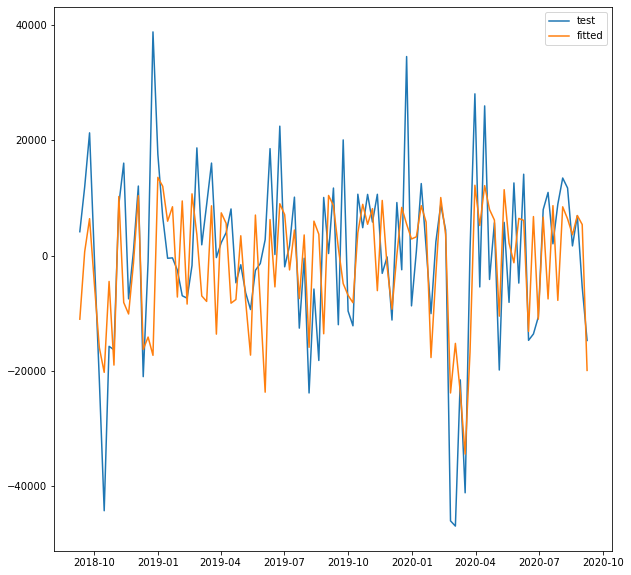

In [113]:
fig = plt.figure(figsize = [10,10])
plt.plot(test_weekly_data['Time'], y_test, label = 'test')
plt.plot(test_weekly_data['Time'], rf.predict(X_test.values), label = 'fitted')
plt.legend()